<a href="https://colab.research.google.com/github/mrcodean/start-python-/blob/main/Life_Expectancy_Prediction_Using_Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Life Expectancy Prediction Using Machine Learning

The project Titled "Life Expectancy Prediction Using Machine Learning" this Project is part of Guided project from Coursera, This project primarily focues on Predicting Life Expectancy using Machine Learning methods from a macroeconomic dataset.

Objective :
1. Build a Linear Regression Model with the given data with relevant variables.
2. To find Which variable has more impact on Life Expantancy of Human Beings.
2. To Test and Evaluate the model with various Evaluation matrices.

Methodology :
1. We have collected data through world bank which is secondary source of data collection which has the world level data of 'Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality','infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B','Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure','Diphtheria ', ' HIV/AIDS', 'GDP', 'Population', ' thinness  1-19 years', ' thinness 5-9 years','Income composition of resources', 'Schooling' .

2. We will be also using Random Forest Regressor to find which variable has more impact in Life Expectancy.

3. We will be using linear Regression to predict life expectancy because life expantancy is a contineous variable.


### This projects goes through following steps

1. Importing Libraries and the dataset from drive.
2. Exploratory Data Analysis.
3. Feature Engineering
4. Model Development
5. Model Evaluation  

### Importing Libraries and Dataset

In [140]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error , mean_absolute_error,r2_score


In [141]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [142]:
import warnings
warnings.filterwarnings('ignore')

In [143]:
df = pd.read_csv('/content/drive/MyDrive/INTERNSHIP/Data/Life Expectancy Data.csv')

df

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,Zimbabwe,2004,Developing,44.3,723.0,27,4.36,0.000000,68.0,31,...,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2
2934,Zimbabwe,2003,Developing,44.5,715.0,26,4.06,0.000000,7.0,998,...,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5
2935,Zimbabwe,2002,Developing,44.8,73.0,25,4.43,0.000000,73.0,304,...,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0
2936,Zimbabwe,2001,Developing,45.3,686.0,25,1.72,0.000000,76.0,529,...,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8


### Exploratory Data Analysis

In [144]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

From this information we can find that;
1. This data set has 2938 rows and 22 columns
2. There are two categorical variable and others are in integers and float.
3. Has a less amount of null values.

Here by we will be converting the variable "Status" to numerical variable from Descriptive Categorical variable.


In [145]:
df = pd.get_dummies(df, columns = ['Status'])
df

,Country,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,...,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling,Status_Developed,Status_Developing
0,Afghanistan,2015,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,...,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1,0,1
1,Afghanistan,2014,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,...,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0,0,1
2,Afghanistan,2013,59.9,268.0,66,0.01,73.219243,64.0,430,18.1,...,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9,0,1
3,Afghanistan,2012,59.5,272.0,69,0.01,78.184215,67.0,2787,17.6,...,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8,0,1
4,Afghanistan,2011,59.2,275.0,71,0.01,7.097109,68.0,3013,17.2,...,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,Zimbabwe,2004,44.3,723.0,27,4.36,0.000000,68.0,31,27.1,...,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2,0,1
2934,Zimbabwe,2003,44.5,715.0,26,4.06,0.000000,7.0,998,26.7,...,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5,0,1
2935,Zimbabwe,2002,44.8,73.0,25,4.43,0.000000,73.0,304,26.3,...,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0,0,1
2936,Zimbabwe,2001,45.3,686.0,25,1.72,0.000000,76.0,529,25.9,...,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8,0,1


We are droping the variable "country" because we are not going we are not accounting Based on country,however we will be accounting based on the "status" of the Country.

In [146]:
df = df.drop(columns = ['Country'])

In [147]:
df.isnull().sum()

Year                                 0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
 BMI                                34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
 HIV/AIDS                            0
GDP                                448
Population                         652
 thinness  1-19 years               34
 thinness 5-9 years                 34
Income composition of resources    167
Schooling                          163
Status_Developed                     0
Status_Developing                    0
dtype: int64

Replacing the missing values with mean values.

In [148]:
df = df.apply(lambda x: x.fillna(x.mean()), axis = 0 )

df.isnull().sum()

Year                               0
Life expectancy                    0
Adult Mortality                    0
infant deaths                      0
Alcohol                            0
percentage expenditure             0
Hepatitis B                        0
Measles                            0
 BMI                               0
under-five deaths                  0
Polio                              0
Total expenditure                  0
Diphtheria                         0
 HIV/AIDS                          0
GDP                                0
Population                         0
 thinness  1-19 years              0
 thinness 5-9 years                0
Income composition of resources    0
Schooling                          0
Status_Developed                   0
Status_Developing                  0
dtype: int64

In [149]:
df

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,...,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling,Status_Developed,Status_Developing
0,2015,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,83,...,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1,0,1
1,2014,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,86,...,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0,0,1
2,2013,59.9,268.0,66,0.01,73.219243,64.0,430,18.1,89,...,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9,0,1
3,2012,59.5,272.0,69,0.01,78.184215,67.0,2787,17.6,93,...,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8,0,1
4,2011,59.2,275.0,71,0.01,7.097109,68.0,3013,17.2,97,...,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,2004,44.3,723.0,27,4.36,0.000000,68.0,31,27.1,42,...,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2,0,1
2934,2003,44.5,715.0,26,4.06,0.000000,7.0,998,26.7,41,...,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5,0,1
2935,2002,44.8,73.0,25,4.43,0.000000,73.0,304,26.3,40,...,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0,0,1
2936,2001,45.3,686.0,25,1.72,0.000000,76.0,529,25.9,39,...,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8,0,1


<Axes: >

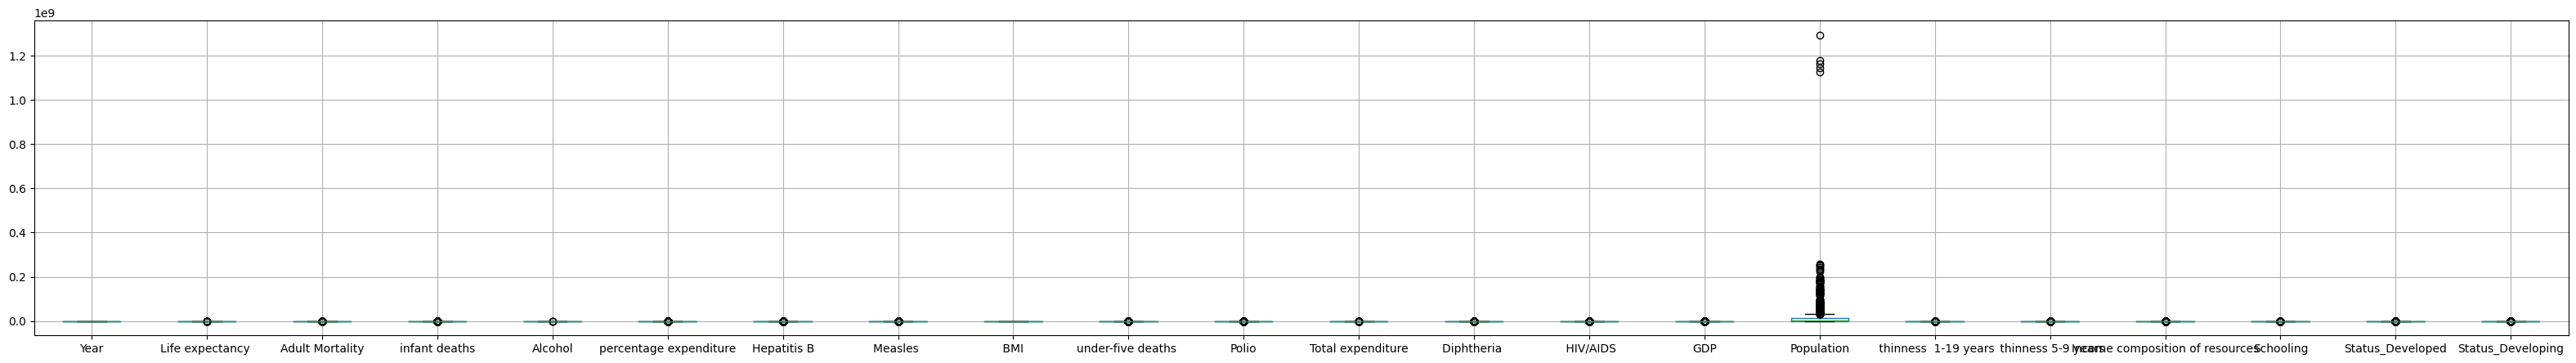

In [150]:
ax = plt.subplots(figsize = (40,5))
df.boxplot()

From the above Box Plot we can find that the variable population has a more number of outliers comparitively, beacause of the classification of each country.


In [151]:
df.describe()

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,...,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling,Status_Developed,Status_Developing
count,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,...,2938.000000,2938.000000,2938.000000,2.938000e+03,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000
mean,2007.518720,69.224932,164.796448,30.303948,4.602861,738.251295,80.940461,2419.592240,38.321247,42.035739,...,82.324084,1.742103,7483.158469,1.275338e+07,4.839704,4.870317,0.627551,11.992793,0.174268,0.825732
std,4.613841,9.507640,124.080302,117.926501,3.916288,1987.914858,22.586855,11467.272489,19.927677,160.445548,...,23.640073,5.077785,13136.800417,5.381546e+07,4.394535,4.482708,0.204820,3.264381,0.379405,0.379405
min,2000.000000,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,0.000000,...,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000,0.000000,0.000000
25%,2004.000000,63.200000,74.000000,0.000000,1.092500,4.685343,80.940461,0.000000,19.400000,0.000000,...,78.000000,0.100000,580.486996,4.189172e+05,1.600000,1.600000,0.504250,10.300000,0.000000,1.000000
50%,2008.000000,72.000000,144.000000,3.000000,4.160000,64.912906,87.000000,17.000000,43.000000,4.000000,...,93.000000,0.100000,3116.561755,3.675929e+06,3.400000,3.400000,0.662000,12.100000,0.000000,1.000000
75%,2012.000000,75.600000,227.000000,22.000000,7.390000,441.534144,96.000000,360.250000,56.100000,28.000000,...,97.000000,0.800000,7483.158469,1.275338e+07,7.100000,7.200000,0.772000,14.100000,0.000000,1.000000
max,2015.000000,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,87.300000,2500.000000,...,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000,1.000000,1.000000


### Feature Engineering

This process of Feature Engineering starts with,
1. Classifying the Dependent and Independent Variables
2. Spliting the Dataset into training and testing methods.
3. Building a Random Forest Regressor Model to find the impact of the varibles.
4. Rebuild the model with linear regression with most important variables.

In [152]:
x = df.drop(columns = ['Life expectancy '])
y = df['Life expectancy ']

In [153]:
x_train , x_test ,y_train ,y_test = train_test_split(x,y, test_size = 0.3 ,
                                                     random_state = 0)

print('X Traning Set Dimensions :' ,x_train.shape)
print('Y Traning Set Dimensions :' ,y_train.shape)

X Traning Set Dimensions : (2056, 21)
Y Traning Set Dimensions : (2056,)


Text(0.5, 1.0, 'Most Affecting Variable')

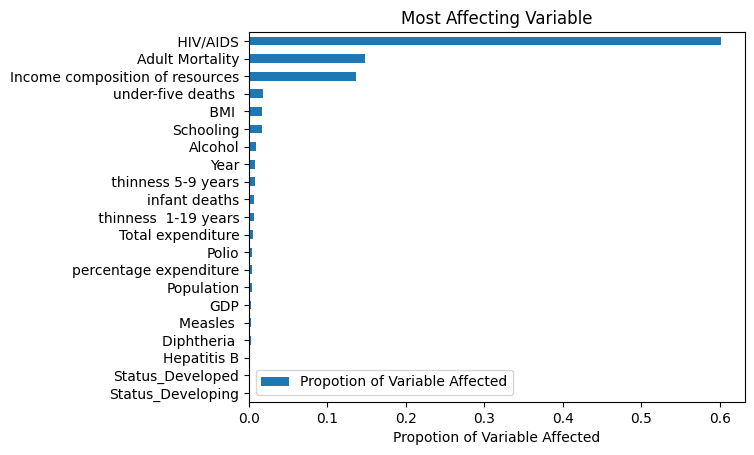

In [154]:
rfr = RandomForestRegressor()
rfr.fit(x_train , y_train)
feat_scores = pd.DataFrame({'Propotion of Variable Affected' : rfr.feature_importances_},
                           index = x.columns)
feat_scores = feat_scores.sort_values(by = 'Propotion of Variable Affected' )
feat_scores.plot(kind = 'barh')
plt.xlabel('Propotion of Variable Affected')
plt.title('Most Affecting Variable')

From the above Graph we can find that the Variables "HIV/AIDS" , "Adult Mortality" , "Income composition of Resource" , "under-five deaths" , "BMI" , "Schooling" and "Alcoohol" have a High impact on the life expectancy in the world, in which "HIV/AIDS" is the most impactful than other variables.


Text(0.5, 1.0, 'Correlation Between Variables')

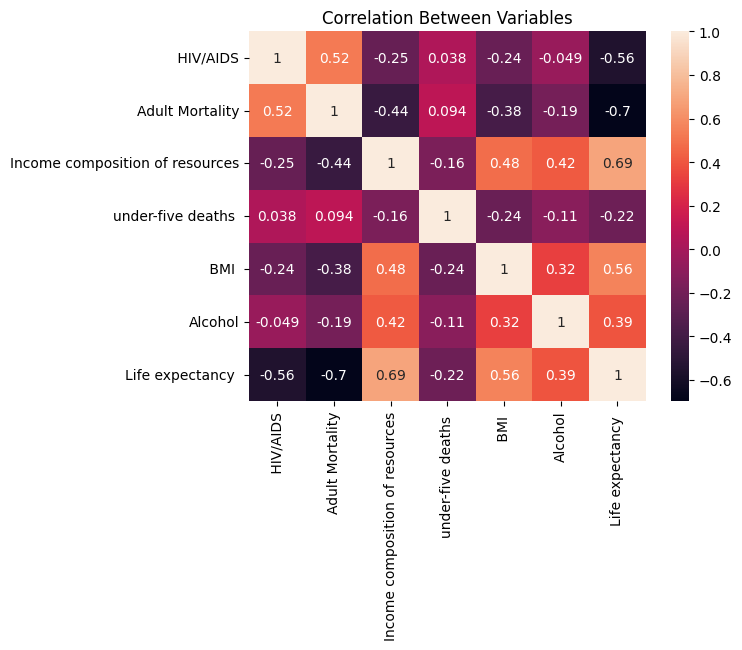

In [155]:
cdf = df[[' HIV/AIDS', 'Adult Mortality' , 'Income composition of resources' ,
        'under-five deaths ' , ' BMI ' , 'Alcohol' , 'Life expectancy ']]
cdf = cdf.corr()

sns.heatmap(cdf , annot = True)
plt.title('Correlation Between Variables')


From this correlation matrix we can find that the variables are not correlated and some of the variables are negatively correlated, Thus we can conclude that the is no problem of multicollinearity.

### Model Development

In [156]:
x = df[[' HIV/AIDS', 'Adult Mortality' , 'Income composition of resources' ,
        'under-five deaths ' , ' BMI ' , 'Alcohol' ]]
y = df['Life expectancy ']

In [157]:
x_train , x_test ,y_train ,y_test = train_test_split(x,y, test_size = 0.3 ,
                                                     random_state = 0)


print('X Traning Set Dimensions :' ,x_train.shape)
print('X Testing Set Dimensions :' ,x_test.shape)
print('Y Traning Set Dimensions :' ,y_train.shape)
print('Y Testing Set Dimensions:' ,y_test.shape)

X Traning Set Dimensions : (2056, 6)
X Testing Set Dimensions : (882, 6)
Y Traning Set Dimensions : (2056,)
Y Testing Set Dimensions: (882,)


In [158]:
lm = LinearRegression()
lm.fit(x_train,y_train)

print('Results: \nIntercept :', lm.coef_)
print('Coefficient :', lm.intercept_)
print('R Score (Train) :', lm.score(x_train,y_train))
print('R Score (Testing) :', lm.score(x_test,y_test))

Results: 
Intercept : [-4.45901945e-01 -2.42330704e-02  1.64777492e+01 -4.66789849e-03
  7.53932137e-02  2.58366571e-01]
Coefficient : 59.744594422880844
R Score (Train) : 0.7573182111456802
R Score (Testing) : 0.7555617088242742


In [159]:
t_stat , p_val = stats.ttest_ind(x_train , y_train)

print('P Value :' , p_val)
print('T Statistic :' , t_stat)

P Value : [0.00000000e+000 1.83442298e-233 0.00000000e+000 6.66433573e-014
 0.00000000e+000 0.00000000e+000]
T Statistic : [-276.20464682   34.85771805 -325.75704281   -7.52045552  -63.00614155
 -284.34568247]


In [160]:
y_pred = lm.predict(x_test)

The above Results Explians as follows :
1. At 1% of P value each Dependent variabel are significant in the model.
2. The Variable HIV/AIDS, Adult Mortality and under-five deaths have a  negative relationship with the Life Exxpectency.
3. The variables Income composition of resources , BMI and Alcohol have a positive relation with Life Expectancy.
4. The R Score of training and testing shows that there is no problem of overfitting or under fitting.
5. The coefficent expliands that even though there is no change in the dependet variables the Life Expectancy age is 59.



Text(0.5, 1.0, 'Distribution of Actual and Predicted Values of Life Expectancy')

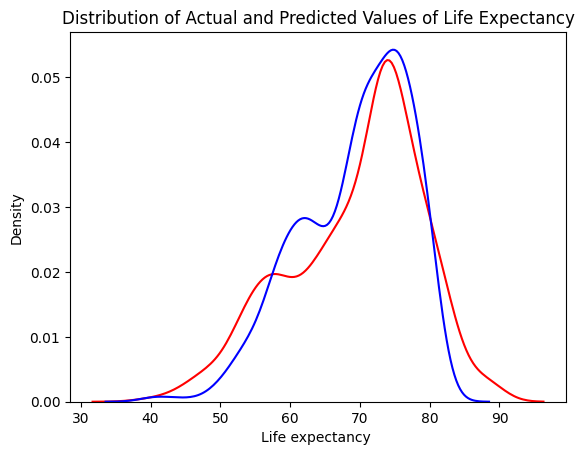

In [161]:
axl = sns.distplot(y_test , color = 'r' , hist = False)
sns.distplot(y_pred, hist = False , color ='b' , ax = axl)

plt.title('Distribution of Actual and Predicted Values of Life Expectancy')


As we already know that the R score is around .75 which is not a good fit for prediction, this graphs supports it by the distribution of Predicted and actual Values of Life expectancy where the predicted values are not able to cover with the acutal values in the graph.

Text(0.5, 1.0, 'Scatter plot of Predicted and Actual Values')

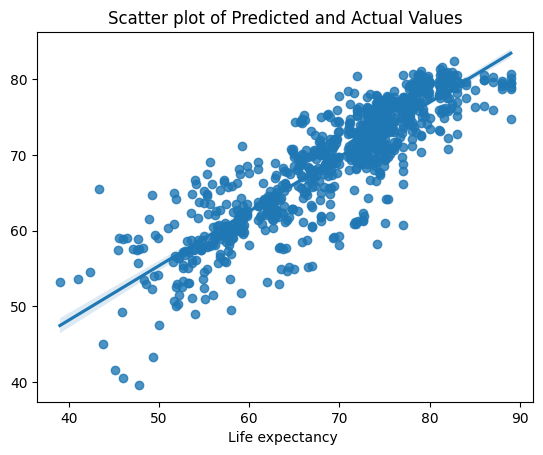

In [162]:
sns.regplot( x = y_test , y = y_pred)

plt.title('Scatter plot of Predicted and Actual Values')

This scatter Plot Signifies that the predicted and actual variables of Life Expectancy is very unfitted with the regression line where that is not fitting properly in the model.

In this graph we can find there is a significant hetrosekdasticity in the dataset.

### Model Evaluation

We will be eveluating the model with three metrics which are;
1. Mean Squared Error
2. Mean Absolute error
3. R square

In [163]:
mes = mean_squared_error(y_test,y_pred)
mas = mean_absolute_error(y_test,y_pred)
r2 = r2_score(y_test,y_pred)

print('Mean Squared Error :',mes)
print('Mean Absolute Error :',mas)
print('R2 score :',r2)

Mean Squared Error : 21.81175282349763
Mean Absolute Error : 3.4236484945140844
R2 score : 0.7555617088242742


Results explanation :
1. The value of R square explians that only 75% of Dependent variable is explained by Independent variabel.
2. The values of MSE and MAE are low which is good, however the Predictability of this model is very low.

### Findings

The conclusions drawn from the analysis were as follows:

1. At a 1% significance level (P-value), each dependent variable was significant in the model.
2. The variables HIV/AIDS, Adult Mortality, and under-five deaths had a negative relationship with life expectancy, while the variables Income composition of resources, BMI, and Alcohol had a positive relationship with life expectancy.
3. The R-Square value indicated that only 75% of the dependent variable was explained by the independent variables.
4. The values of Mean Squared Error (MSE) and Mean Absolute Error (MAE) were low, indicating good model performance in terms of accuracy.
4. However, the predictability of the model was noted to be very low.

### Conclusion and Future Development

The project successfully built a linear regression model to predict life expectancy using relevant variables. It identified the significant variables impacting life expectancy and evaluated the model using various metrics. Despite achieving a relatively low predictability, the project provided valuable insights into the relationships between various factors and life expectancy. Further improvements or exploration of different machine learning models may be necessary to enhance the predictability of the model. For further development We can increase the number of data points, add more variables, and manupulating data for making it having white noise, which will significantly imporve the predictability of the model.